# Credit Score Card Prediction

# Task from Kaggle
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to **construct you label**. Also, **unbalanced** data problem is a big problem in this task.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
sklearn.__version__

'0.24.1'

# Load data

In [3]:
app = pd.read_csv("application_record.csv")

In [103]:
crecord = pd.read_csv("credit_record.csv")

In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

* `object` : CODE_GENDER, FLAG_OWN_CAR,FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE
* `int` : ID, CNT_CHILDREN, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL
* `float` : AMT_INCOME_TOTAL, CNT_FAMILY_MEMBERS

In [4]:
crecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Data cleaning

In [5]:
# check to see how many records match in two datasets

len(set(crecord['ID']).intersection(set(app['ID']))) 

36457

In [4]:
# drop duplicates identified by ID from app (note: don't drop from crecord)
# assume last record is most up to date

app.drop_duplicates('ID', keep='last', inplace=True) 

In [11]:
# percent missing from each col

app.isnull().sum(axis = 0) / len(app) * 100

ID                      0.00000
CODE_GENDER             0.00000
FLAG_OWN_CAR            0.00000
FLAG_OWN_REALTY         0.00000
CNT_CHILDREN            0.00000
AMT_INCOME_TOTAL        0.00000
NAME_INCOME_TYPE        0.00000
NAME_EDUCATION_TYPE     0.00000
NAME_FAMILY_STATUS      0.00000
NAME_HOUSING_TYPE       0.00000
DAYS_BIRTH              0.00000
DAYS_EMPLOYED           0.00000
FLAG_MOBIL              0.00000
FLAG_WORK_PHONE         0.00000
FLAG_PHONE              0.00000
FLAG_EMAIL              0.00000
OCCUPATION_TYPE        30.60067
CNT_FAM_MEMBERS         0.00000
dtype: float64

In [5]:
app.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [13]:
crecord.isnull().sum(axis = 0)

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

# App df - data prep

## Outliers / transformations numerical columns

In [6]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [7]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [8]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

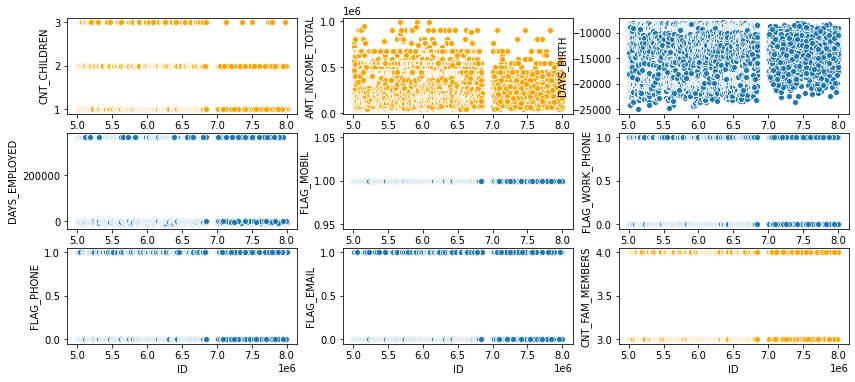

In [27]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

## Variable Encoding categorical columns

In [28]:
app['CODE_GENDER'].value_counts(normalize=True)

F    0.58899
M    0.41101
Name: CODE_GENDER, dtype: float64

In [9]:
gender_dict = {'M':0, 'F':1}
app['CODE_GENDER'] = app.CODE_GENDER.map(gender_dict)

In [16]:
app['FLAG_OWN_CAR'].value_counts(normalize=True)

N    0.6281
Y    0.3719
Name: FLAG_OWN_CAR, dtype: float64

In [14]:
app['FLAG_OWN_REALTY'].value_counts(normalize=True)

Y    0.693355
N    0.306645
Name: FLAG_OWN_REALTY, dtype: float64

In [10]:
yn_dict = {'N':0, 'Y':1}
app['FLAG_OWN_CAR'] = app.FLAG_OWN_CAR.map(yn_dict)
app['FLAG_OWN_REALTY'] = app.FLAG_OWN_REALTY.map(yn_dict)

In [7]:
app['NAME_HOUSING_TYPE'].value_counts(normalize=True)

House / apartment      0.898014
With parents           0.043497
Municipal apartment    0.032412
Rented apartment       0.013623
Office apartment       0.008944
Co-op apartment        0.003510
Name: NAME_HOUSING_TYPE, dtype: float64

In [8]:
app['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.515580
Commercial associate    0.229730
Pensioner               0.172135
State servant           0.082516
Student                 0.000039
Name: NAME_INCOME_TYPE, dtype: float64

In [9]:
app['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.688215
Higher education                 0.267973
Incomplete higher                0.033862
Lower secondary                  0.009238
Academic degree                  0.000712
Name: NAME_EDUCATION_TYPE, dtype: float64

In [10]:
app['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married                 0.683674
Single / not married    0.126036
Civil marriage          0.083291
Separated               0.062140
Widow                   0.044859
Name: NAME_FAMILY_STATUS, dtype: float64

In [11]:
app = pd.get_dummies(app, prefix=['HOUSING', 'INCOME', 'EDUCATION', 'FAMILY'], 
                     columns=['NAME_HOUSING_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'])

In [102]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,FAMILY_Civil marriage,FAMILY_Married,FAMILY_Separated,FAMILY_Single / not married,FAMILY_Widow
29,5008838,0,0,1,1,405000.0,-11842,-2016,1,0,...,0,1,0,0,0,0,1,0,0,0
30,5008839,0,0,1,1,405000.0,-11842,-2016,1,0,...,0,1,0,0,0,0,1,0,0,0
31,5008840,0,0,1,1,405000.0,-11842,-2016,1,0,...,0,1,0,0,0,0,1,0,0,0
32,5008841,0,0,1,1,405000.0,-11842,-2016,1,0,...,0,1,0,0,0,0,1,0,0,0
33,5008842,0,0,1,1,405000.0,-11842,-2016,1,0,...,0,1,0,0,0,0,1,0,0,0


In [33]:
# check data types
# app.info()

# Crecord df - data prep

In [34]:
crecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [104]:
crecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [37]:
crecord['STATUS'].value_counts(normalize=True) 

C    0.421554
0    0.365372
X    0.199537
1    0.010576
5    0.001615
2    0.000828
3    0.000305
4    0.000213
Name: STATUS, dtype: float64

* 0: 1-29 days past due 
* 1: 30-59 days past due 
* 2: 60-89 days overdue 
* 3: 90-119 days overdue 
* 4: 120-149 days overdue 
* 5: Overdue or bad debts, write-offs for more than 150 days 
* C: paid off that month 
* X: No loan for the month

In [105]:
# for now, label by level of severity (ordinal)
crecord['STATUS'].replace({'X': 0, 'C' : 0, '0' : 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6}, inplace=True)

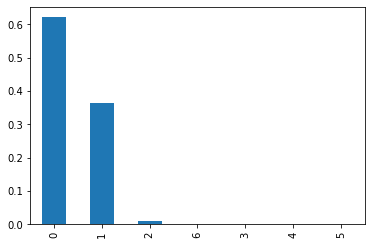

In [106]:
(crecord['STATUS'].value_counts(normalize=True)).plot(kind='bar');

**Unbalanced** labels: when split training and test will have to oversample rare categories of train

In [107]:
# group by ID, keep most recent
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head() 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001712,0,1
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0


In [108]:
# join inner, where entries in app will be assigned most recent status
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,FAMILY_Civil marriage,FAMILY_Married,FAMILY_Separated,FAMILY_Single / not married,FAMILY_Widow,STATUS
29,5008838,0,0,1,1,405000.0,-11842,-2016,1,0,...,1,0,0,0,0,1,0,0,0,1
30,5008839,0,0,1,1,405000.0,-11842,-2016,1,0,...,1,0,0,0,0,1,0,0,0,1
31,5008840,0,0,1,1,405000.0,-11842,-2016,1,0,...,1,0,0,0,0,1,0,0,0,1
32,5008841,0,0,1,1,405000.0,-11842,-2016,1,0,...,1,0,0,0,0,1,0,0,0,1
33,5008842,0,0,1,1,405000.0,-11842,-2016,1,0,...,1,0,0,0,0,1,0,0,0,1


# Create train and test sets

In [109]:
# drop ID column 
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Scale features using statistics that are robust to outliers, i.e. not 
# influenced by a few number of very large marginal outliers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

X_train_scaled = RobustScaler().fit_transform(X_train)
X_test_scaled = RobustScaler().fit_transform(X_test)

In [111]:
# needed as df for explainer

X_dftrain_scaled = pd.DataFrame(RobustScaler().fit_transform(X_train), columns=X_train.columns)
X_dftest_scaled = pd.DataFrame(RobustScaler().fit_transform(X_test), columns=X_test.columns)

In [112]:
from imblearn.over_sampling import SMOTE

> Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

In [113]:
oversample = SMOTE(random_state=64)
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train_scaled, y_train)

In [ ]:
X_train_balanced_unscaled, y_train_balanced_unscaled = oversample.fit_resample(X_train, y_train)

In [114]:
y_train_balanced.value_counts()

6    5020
5    5020
4    5020
3    5020
2    5020
1    5020
0    5020
Name: STATUS, dtype: int64

# Fit models and evaluate performance of validation set

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [116]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

Log Regression by default adds L2 penalty (-squared weights). 

In [117]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedKFold(n_splits=10, random_state=1, n_repeats=1)

In [118]:
val_model_scores = {}

for key, classifier in classifiers.items():
    print(f'Evaluating classifier {key}')
    scores = cross_val_score(classifier, X_train_balanced, y_train_balanced, scoring='accuracy', cv=cv, n_jobs=-1)
    val_model_scores[str(key)] = np.mean(scores)

Evaluating classifier LogisticRegression
Evaluating classifier KNeighbors
Evaluating classifier SVC
Evaluating classifier DecisionTree
Evaluating classifier RandomForest
Evaluating classifier XGBoost


In [119]:
# get sorted classifier scores
{k: v for k, v in sorted(val_model_scores.items(), key=lambda item: item[1], reverse=True)}

{'RandomForest': 0.9342060330108138,
 'XGBoost': 0.9226522481502561,
 'DecisionTree': 0.9107000569151964,
 'KNeighbors': 0.8942800227660784,
 'SVC': 0.561326124075128,
 'LogisticRegression': 0.4822140011383039}

Best CV performance (accuracy) on validation set at default params with Random Forest Classifier.

# Model tuning

In [120]:
classifier = RandomForestClassifier()

classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [121]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'criterion' : ['gini', 'entropy'], 
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4],
               'n_estimators' : [int(x) for x in np.linspace(100,1000, num=10)]
              }

Two key parameters for random search are `n_estimators` (# of trees) and `max_features` (max # features considered for splitting a node)

Num combinations = 2 x 2 x 3 x 3 x 10 = 3,600

In [123]:
# reduce number of CV folds to increase speed a bit, especially with 100 iterations

rf_random = RandomizedSearchCV(estimator=classifier, 
                               param_distributions=grid_params, 
                               n_iter=100, 
                               cv=3, 
                               scoring='accuracy',
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)

In [124]:
rf_random.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [125]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'criterion': 'gini'}

In [126]:
best_rf = rf_random.best_estimator_
best_rf

RandomForestClassifier(n_estimators=800)

In [127]:
best_rf_score = rf_random.best_score_
best_rf_score

0.9305927002079496

No increase in performance, try probability distribution-based search next.

# Predict on test set

In [128]:
prediction = best_rf.predict(X_test_scaled)

In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       367
           1       0.85      0.83      0.84      2155
           2       0.40      0.44      0.42       291
           3       0.24      0.19      0.21        21
           4       0.00      0.00      0.00         2
           5       1.00      0.25      0.40         4
           6       0.43      0.20      0.27        15

    accuracy                           0.74      2855
   macro avg       0.48      0.35      0.37      2855
weighted avg       0.75      0.74      0.75      2855



Fewer cases of 4, 5, 6

Conclusions : 
* Test accuracy lower than training and validation sets, consider some methods to reduce overfitting.
* Additionally, if do RF or DT, don't need to scale features -> so use unscaled (but balanced) training data.


## try test and training unscaled

In [ ]:
best_rf.fit(X_train_balanced_unscaled, y_train_balanced_unscaled)

In [ ]:
prediction = best_rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

# opt: Explore ensemble methods

# Explainer Dashboard for test data

In [58]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [130]:
best_rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(n_estimators=800)

In [131]:
feature_descriptions = {
    "CODE_GENDER": "Gender of client",
    "FLAG_OWN_CAR": "Has a car",
    "FLAG_OWN_REALTY": "Has a property",
    "CNT_CHILDREN": "Number of children",
    "AMT_INCOME_TOTAL": "Annual income", 
    "NAME_INCOME_TYPE": "Income category",
    "NAME_EDUCATION_TYPE": "Education type",
    "NAME_FAMILY_STATUS": "Marital status",
    "NAME_HOUSING_TYPE" : "Housing type",
    "DAYS_BIRTH": 'Days since birth',
    "DAYS_EMPLOYED": 'Days since employment',
    "FLAG_MOBIL": 'Has a mobile phone',
    "FLAG_WORK_PHONE": 'Has a work phone',
    "FLAG_EMAIL": 'Has an email',
    "CNT_FAM_MEMBERS": 'Family size'
}

In [132]:
# cats contains one-hot-encoded vectors

explainer = ClassifierExplainer(best_rf, X_dftest_scaled, y_test, 
  cats=['NAME_HOUSING_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'],
  descriptions=feature_descriptions, 
  labels=['No loan/paid off', '1-29 days past due', '30-59 days past due', '60-89 days past due', 
          '90-119 days past due', '120-149 days past due', 'overdue more than 150 days'], 
  target = "Credit")

Note: shap=='guess' so guessing for RandomForestClassifier shap='tree'...
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
db = ExplainerDashboard(explainer, title="Credit Explainer", mode='external').run(port=8050)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating categorical permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating prediction probabilities...
Calculating predictions...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.


Possible arguments to ExplainerDashboard to hide tabs:
* importances=True/False,
* model_summary=True/False,
* contributions=True/False,
* whatif=True/False,
* shap_dependence=True/False,
* shap_interaction=True/False,
* decision_trees=True/False

(removing some decreases time complexity of computing/creating dashboard, esp SHAP values)

see [this](https://medium.com/analytics-vidhya/explainer-dashboard-build-interactive-dashboards-for-machine-learning-models-fda63e0eab9)

or hide individual components of tab:

or hide toggles and dropdowns within each component (but if appears on more than one component, then toggles it on/off for all components)

and set some defaults

In [ ]:
# store both the explainer and the dashboard configuration:

explainer.dump("explainer_v1.joblib")
db.to_yaml("dashboard_v1.yaml")

In [ ]:
#from explainerdashboard import ClassifierExplainer, ExplainerDashboard

#explainer = ClassifierExplainer.from_file("explainer.joblib")
#db = ExplainerDashboard.from_config(explainer, "dashboard.yaml", title="Credit Explainer Dashboard")
#app = db.flask_server()

# and run with $ gunicorn dashboard:app